In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn
import pickle as pkl

In [3]:
targ = pd.read_csv('../data/raw/Targetome_FullEvidence_070617.txt', sep='\t')
targ = targ.assign(drug=lambda x: x.Drug.str.lower())

#targ = targ[targ.Target_Type =='Protein']
#targ = targ[targ.Target_Species =='Homo sapiens']
targ.drug = [str(x) for x in targ.drug.values]
targ.head()

,Drug,Target_Name,Target_Type,Target_UniProt,Target_Species,Database,Reference,Assay_Type,Assay_Relation,Assay_Value,EvidenceLevel_Assigned,drug
0,Vemurafenib,RAF1,Protein,P04049,Homo sapiens,BindingDB,22808911,IC50,=,48.0,III,vemurafenib
1,Vemurafenib,RAF1,Protein,P04049,Homo sapiens,IUPHAR,22808911,IC50,=,NaN,III,vemurafenib
2,Vemurafenib,RAF1,Protein,P04049,Homo sapiens,IUPHAR,26343583,IC50,=,NaN,III,vemurafenib
3,Vemurafenib,EGFR,Protein,P00533,Homo sapiens,BindingDB,24588073,IC50,>,10000.0,III,vemurafenib
4,Vemurafenib,BRAF,Protein,P15056,Homo sapiens,Therapeutic Target Database,NA_TTD,NaN,NaN,NaN,I,vemurafenib


In [7]:
lincs_cmpinfo = pd.read_csv('../../LINCS/LVL3/data/raw/compoundinfo_beta.txt', sep='\t')
lincs_cmpinfo.head()

,pert_id,cmap_name,target,moa,canonical_smiles,inchi_key,compound_aliases
0,BRD-A08715367,L-theanine,NaN,NaN,CCNC(=O)CCC(N)C(O)=O,DATAGRPVKZEWHA-UHFFFAOYSA-N,l-theanine
1,BRD-A12237696,L-citrulline,NaN,NaN,NC(CCCNC(N)=O)C(O)=O,RHGKLRLOHDJJDR-UHFFFAOYSA-N,l-citrulline
2,BRD-A18795974,BRD-A18795974,NaN,NaN,CCCN(CCC)C1CCc2ccc(O)cc2C1,BLYMJBIZMIGWFK-UHFFFAOYSA-N,7-hydroxy-DPAT
3,BRD-A27924917,BRD-A27924917,NaN,NaN,NCC(O)(CS(O)(=O)=O)c1ccc(Cl)cc1,WBSMZVIMANOCNX-UHFFFAOYSA-N,2-hydroxysaclofen
4,BRD-A35931254,BRD-A35931254,NaN,NaN,CN1CCc2cccc-3c2C1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-UHFFFAOYSA-N,r(-)-apomorphine


In [13]:
with open('../../DDS_graph.pkl', 'rb') as f: 
        DDS_graph = pkl.load(f)

with open('../../PPI_graph.pkl', 'rb') as f: 
    PPI_graph = pkl.load(f)

drugs = DDS_graph['nodelist']
genes = PPI_graph['nodelist']

In [17]:
# how many drugs in targetome overlap in cmap? 
overlap = set(targ.drug).intersection(set(drugs))
len(overlap)

41

In [18]:
overlap

{'anastrozole',
 'axitinib',
 'azacitidine',
 'belinostat',
 'bicalutamide',
 'bortezomib',
 'bosutinib',
 'capecitabine',
 'carmustine',
 'chlorambucil',
 'crizotinib',
 'cyclophosphamide',
 'cytarabine',
 'dacarbazine',
 'dasatinib',
 'decitabine',
 'dexamethasone',
 'docetaxel',
 'enzalutamide',
 'etoposide',
 'exemestane',
 'fluorouracil',
 'flutamide',
 'gefitinib',
 'ifosfamide',
 'imiquimod',
 'lenalidomide',
 'letrozole',
 'lomustine',
 'mercaptopurine',
 'methotrexate',
 'nilotinib',
 'olaparib',
 'palbociclib',
 'panobinostat',
 'prednisone',
 'sonidegib',
 'temozolomide',
 'thalidomide',
 'toremifene',
 'vemurafenib'}

In [7]:
targ.Assay_Type.unique()

array(['IC50', nan, 'Kd', 'Ki', 'KD', 'EC50'], dtype=object)

In [23]:
targ.groupby('Assay_Type').count()['drug']

Assay_Type
EC50      147
IC50     2598
KD      11212
Kd         27
Ki        680
Name: drug, dtype: int64

In [8]:
targ.Assay_Relation.unique()

array(['=', '>', nan, '<', '~'], dtype=object)

In [17]:
targ.groupby('drug')['Target_Name', 'Assay_Value'].agg('nunique').sort_values(by='Target_Name').tail(25)

<ipython-input-17-8b87e1f0403f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  targ.groupby('drug')['Target_Name', 'Assay_Value'].agg('nunique').sort_values(by='Target_Name').tail(25)


,Target_Name,Assay_Value
drug,,
regorafenib,20,4
pemetrexed disodium,21,60
dexamethasone,21,60
ceritinib,22,33
tamoxifen citrate,23,36
bortezomib,25,27
methotrexate,26,119
vorinostat,27,235
doxorubicin hydrochloride,37,35


In [20]:
targ.assign(low_KD=lambda x: x.Assay_Value < 1000).groupby('drug')['low_KD'].agg(['sum']).sort_values(by='sum').tail(25)

,sum
drug,
belinostat,34
pemetrexed disodium,36
afatinib dimaleate,43
lanreotide acetate,45
ondansetron hydrochloride,55
bicalutamide,62
bexarotene,63
axitinib,74
raloxifene hydrochloride,80


In [22]:
# average across assays 
res = targ[['drug', 'Target_Name', 'Assay_Value']].drop_duplicates().groupby(['drug', 'Target_Name']).agg(['mean', 'std', 'max', 'min', 'count']).reset_index()
res.columns = ['drug', 'target', 'kd_mean', 'kd_std', 'kd_max', 'kd_min', 'n']
res.head(20)

,drug,target,kd_mean,kd_std,kd_max,kd_min,n
0,abiraterone acetate,CYP11B1,1609.000000,1.414214,1610.0,1608.0,2
1,abiraterone acetate,CYP11B2,1750.500000,0.707107,1751.0,1750.0,2
2,abiraterone acetate,CYP17A1,152.316667,318.314061,800.0,2.9,6
3,abiraterone acetate,CYP19A1,25000.000000,22912.878475,50000.0,5000.0,3
4,abiraterone acetate,CYP3A4,2702.000000,2.828427,2704.0,2700.0,2
5,abiraterone acetate,Cytochrome P450 17A1,116.500000,146.371104,220.0,13.0,2
6,afatinib dimaleate,AAK1,10000.000000,NaN,10000.0,10000.0,1
7,afatinib dimaleate,ABL1,994.285714,802.732969,2900.0,230.0,14
8,afatinib dimaleate,ABL2,10000.000000,NaN,10000.0,10000.0,1
9,afatinib dimaleate,ACVR1,10000.000000,NaN,10000.0,10000.0,1


C:\Users\natha\miniconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\natha\miniconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


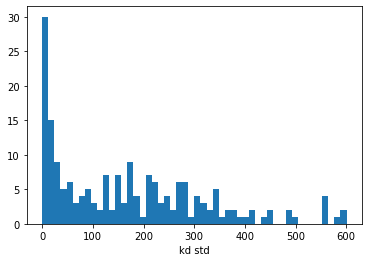

In [32]:
plt.figure()
plt.hist(res.kd_std, bins=50)
plt.xlabel('kd std')
plt.show()

In [33]:
res.groupby(['drug'])['target'].count()

drug
afatinib        12
axitinib        36
bosutinib      116
crizotinib      97
dasatinib       82
erlotinib       38
gefitinib       26
imatinib        22
lapatinib        5
nilotinib       44
pazopanib       50
ponatinib        2
ruxolitinib     59
sorafenib       49
sunitinib      189
Name: target, dtype: int64

In [109]:
res.to_csv('../config/targetome_kinase_targets.csv', index=False)